# SVM for classification

Load IRIS dataset, check its contents:


In [3]:
from sklearn.datasets import load_iris
from sklearn import datasets
import matplotlib.pyplot as plt
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [4]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [5]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [6]:
# select only the first two features
iris = datasets.load_iris()
X, y = iris.data[:, :2], iris.target

# Keep only classes 0 and 1
X, y = X[y < 2], y[y < 2]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train SVM with linear kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# accuracy
print("Model accracy:", svm_model.score(X_test, y_test))

Model accracy: 1.0


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

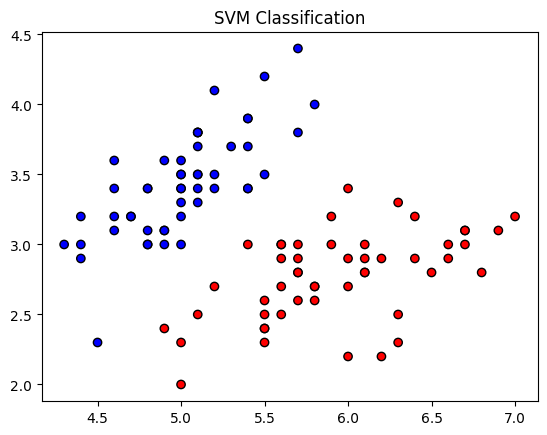

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("SVM Classification")
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [8]:
X=iris.data[iris.target!=2,0:2]
print(X.shape)
y=iris.target[iris.target!=2]
SVMmodel_1=SVC(kernel='linear', C=2000)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y,test_size=0.2)
SVMmodel_1.fit(X_train_1,y_train_1)
print(SVMmodel_1.get_params ())
SVMmodel_1.score(X_test_1,y_test_1)

(100, 2)
{'C': 2000, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


1.0

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

[[-0.2388701   0.48198924 -0.86569635 -0.60242845]
 [-0.02034588  0.18311289 -0.5289928  -0.30518815]
 [ 0.69393379  0.95070954 -2.10277008 -1.94202813]]
[2.27277385 1.54120032 6.45521213]


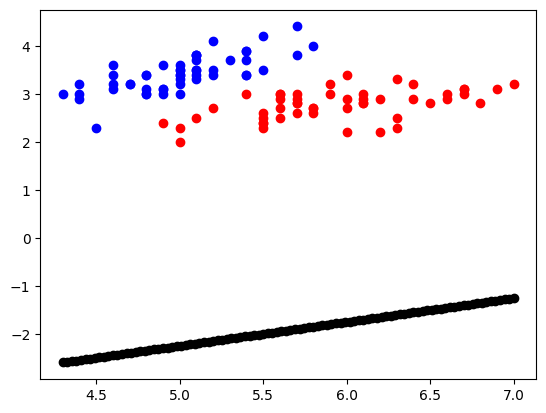

In [9]:
import numpy as np
supvectors=SVMmodel.support_vectors_
# Plot the support vectors here


#Separating line coefficients:
W=SVMmodel.coef_
b=SVMmodel.intercept_
print(W)
print(b)
x1=np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2=-b[0]/W[0,1]-W[0,0]/W[0,1]*x1
plt.scatter(X[y==0,0],X[y==0,1],color='blue')
plt.scatter(X[y==1,0],X[y==1,1],color='red')
plt.scatter(x1,x2,color='black')


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

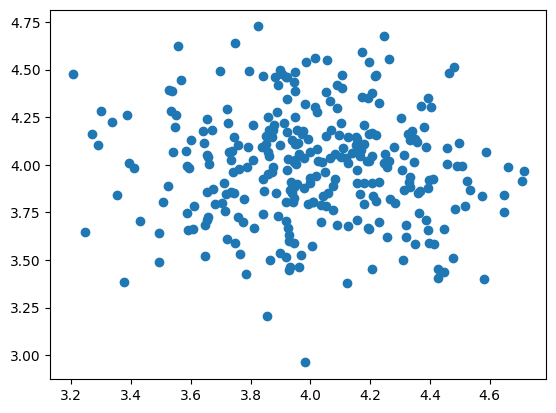

In [10]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

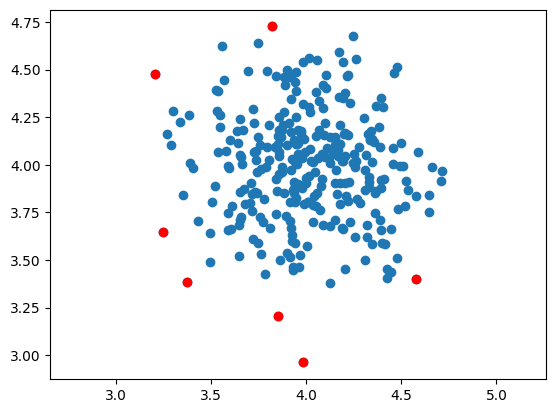

In [11]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

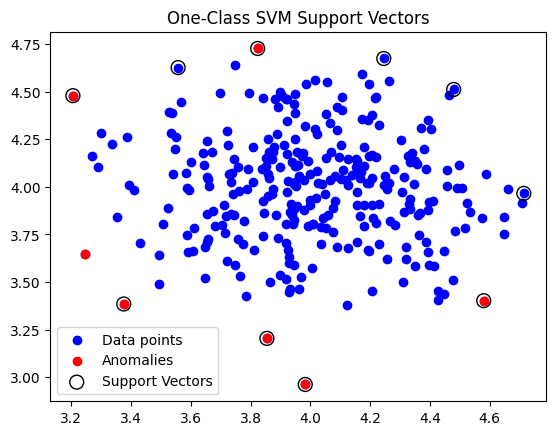

In [12]:
plt.scatter(x[:,0], x[:,1], color='blue', label='Data points')
plt.scatter(values[:,0], values[:,1], color='red', label='Anomalies')

oc_supvectors = SVMmodelOne.support_vectors_

plt.scatter(oc_supvectors[:, 0], oc_supvectors[:, 1],
            s=100,
            linewidth=1,
            facecolors='none',
            edgecolors='black',
            label='Support Vectors')

plt.title("One-Class SVM Support Vectors")
plt.legend()
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


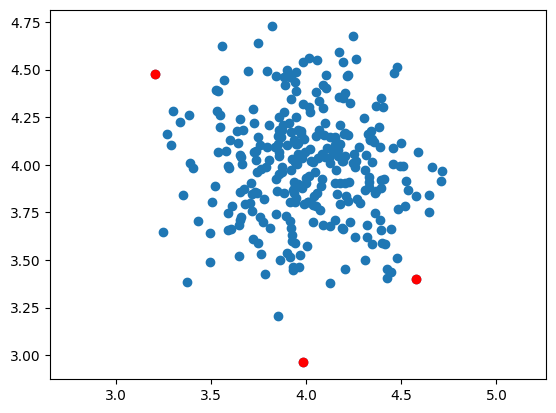

In [13]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()